In [2]:
from sklearn import datasets
# from sqlalchemy import create_engine
import pandas as pd
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO


try:
    import cx_Oracle
except ImportError:
    print('Please install package `cx_Oracle`')
    
%matplotlib inline

plt.style.use('ggplot')
pd.set_option("display.max_column", 100)

Please install package `cx_Oracle`


In [15]:
gamer = pd.read_csv(
                      '../data/gamer.csv',
                       index_col=0
                      )

In [16]:
gamer.shape

(138364, 8)

In [4]:
gplay_game_buyer = pd.read_csv(
                      '../data/gplay_game_buyer.csv',
                       index_col=0
                      )

In [5]:
gplay_game_buyer.shape

(14466, 3)

In [51]:
gamer_num_tag3 = pd.read_csv(
                      '../data/gamer_num_tag3.csv',
                       index_col=0
                      )
gamer_num_tag3.shape

/Users/aaron/Documents/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(11330389, 4)

In [35]:
import random
p = 0.01  # 1% of the lines
# keep the header, then take only 1% of lines

goabroad = pd.read_csv(
                      '../data/airticket_all_ml.csv',
                       index_col=0,
                      skiprows=lambda i: i>0 and random.random() < p
                      )

/Users/aaron/Documents/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## 處理tag num 資料

In [6]:
gamer_num_tag3.head()

,CUST_ID,TAG_NM,TXN_AMT,TXN_CNT
0,00002D9D61AB5C5416BD012A9E9FFCB7,年收入-信用卡進件,440000.00,0
1,00002D9D61AB5C5416BD012A9E9FFCB7,年收入-個授,713917.44,0
2,00002D9D61AB5C5416BD012A9E9FFCB7,年收入-聯徵,595000.00,0
3,00002D9D61AB5C5416BD012A9E9FFCB7,近一年燦坤消費金額、次數,737.00,3
4,00002D9D61AB5C544213A558B687AC58,年收入-信用卡進件,453000.00,0


In [52]:
gamer_num_tag4 = gamer_num_tag3.pivot_table(index='CUST_ID',columns='TAG_NM',values='TXN_AMT').reset_index()

In [53]:
gamer_num_tag4.head()

TAG_NM,CUST_ID,APPLE PAY綁卡數量,GOOGLE PAY綁卡數量,SAMSUNG PAY綁卡數量,年收入-信用卡進件,年收入-個授,年收入-聯徵,近一年APPLE ITUNE STORE消費金額、次數,近一年ATT4FUN消費金額、次數,近一年GOMAJI PAY總消費金額、次數,近一年GOOGLE PLAY消費金額、次數,近一年LINE PAY總消費金額、次數,近一年UBER消費金額、次數,近一年UDN售票網消費次數及金額,近一年YAHOO雅虎消費金額、次數,近一年_新光三越3C用品消費金額與次數,近一年_新光三越娛樂類消費金額與次數,近一年_新光三越男性保養品消費金額與次數,近一年三星電子消費金額、次數,近一年健身房(排女性專用)所消費金額、次數,近一年外送外食服務消費金額、次數,近一年女性專用健身房所消費金額、次數,近一年機場貴賓室權益使用次數,近一年歐付寶總消費金額、次數,近一年淘寶網總消費金額、次數,近一年漢神百貨消費金額、次數,近一年燦坤消費金額、次數,近一年瑜珈所消費金額、次數,近一年華娛KKTIX消費次數及金額,近一年蝦皮購物總消費金額、次數,近一年街口支付消費金額、次數,近半年蘋果專賣店消費金額、次數
0,00002D9D61AB5C5416BD012A9E9FFCB7,NaN,NaN,NaN,440000.0,713917.44,595000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,737.0,NaN,NaN,NaN,NaN,NaN
1,00002D9D61AB5C544213A558B687AC58,NaN,NaN,NaN,453000.0,434880.00,453000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00002D9D61AB5C544395AB9123049938,NaN,NaN,NaN,700000.0,2341024.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00002D9D61AB5C54A5192B292373D78A,NaN,NaN,NaN,213000.0,204480.00,689000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,569.0,NaN,NaN,NaN,NaN,NaN
4,00003E59F1275D9E96F96D6E4AB0CE0D,NaN,NaN,NaN,NaN,528000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
gamer_tag_data = pd.merge(gamer_num_tag4, gamer[['TAG_CD','CUST_ID']], how='left', on='CUST_ID')

In [75]:
gamer_tag_data.sample(20)

,CUST_ID,APPLE PAY綁卡數量,GOOGLE PAY綁卡數量,SAMSUNG PAY綁卡數量,年收入-信用卡進件,年收入-個授,年收入-聯徵,近一年APPLE ITUNE STORE消費金額、次數,近一年ATT4FUN消費金額、次數,近一年GOMAJI PAY總消費金額、次數,近一年GOOGLE PLAY消費金額、次數,近一年LINE PAY總消費金額、次數,近一年UBER消費金額、次數,近一年UDN售票網消費次數及金額,近一年YAHOO雅虎消費金額、次數,近一年_新光三越3C用品消費金額與次數,近一年_新光三越娛樂類消費金額與次數,近一年_新光三越男性保養品消費金額與次數,近一年三星電子消費金額、次數,近一年健身房(排女性專用)所消費金額、次數,近一年外送外食服務消費金額、次數,近一年女性專用健身房所消費金額、次數,近一年機場貴賓室權益使用次數,近一年歐付寶總消費金額、次數,近一年淘寶網總消費金額、次數,近一年漢神百貨消費金額、次數,近一年燦坤消費金額、次數,近一年瑜珈所消費金額、次數,近一年華娛KKTIX消費次數及金額,近一年蝦皮購物總消費金額、次數,近一年街口支付消費金額、次數,近半年蘋果專賣店消費金額、次數,TAG_CD
2809060,B289796FA300FFF7444192ABC9CB6307,1.0,NaN,NaN,550000.0,531548.16,550000.0,NaN,NaN,NaN,NaN,12870.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55179.0,NaN,NaN,NaN,NaN,NaN,NaN
378030,17D6438513782336DC004231B97A7A5B,NaN,NaN,NaN,NaN,261278.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485902,1EA627DA538E12EE8F88AF94F0009CDD,NaN,NaN,NaN,270000.0,391022.40,700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3088066,C45948CE9D690EA322EDEAC366EA6932,NaN,NaN,NaN,766000.0,720000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1525731,60CCF3C2C13A7179B63000B92E760799,NaN,NaN,NaN,267000.0,256320.00,418000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030345,C0C577CCE77753C7FA81C43DBD18003A,NaN,NaN,NaN,400000.0,384000.00,309000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2081805,844EBC4866AEF96674C2A922870EFB90,NaN,NaN,NaN,262000.0,251520.00,266000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379.0,NaN,NaN,NaN,NaN,NaN,NaN
2282767,910F3106D55B8B51F20D5C05DE88B32C,NaN,NaN,NaN,246000.0,236160.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1386232,57F4B092FC4DDA23F1E4E2E0E01B9DA9,NaN,NaN,NaN,NaN,506880.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2505589,9F517A340EFF05A56B9B3ECE00BA8A2B,NaN,NaN,NaN,1336000.0,1282560.00,1330000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(
     gamer_tag_data, test_size=0.02, random_state=42)
X_test.shape

(80562, 33)

In [58]:
X_test.sample(10)

,CUST_ID,APPLE PAY綁卡數量,GOOGLE PAY綁卡數量,SAMSUNG PAY綁卡數量,年收入-信用卡進件,年收入-個授,年收入-聯徵,近一年APPLE ITUNE STORE消費金額、次數,近一年ATT4FUN消費金額、次數,近一年GOMAJI PAY總消費金額、次數,近一年GOOGLE PLAY消費金額、次數,近一年LINE PAY總消費金額、次數,近一年UBER消費金額、次數,近一年UDN售票網消費次數及金額,近一年YAHOO雅虎消費金額、次數,近一年_新光三越3C用品消費金額與次數,近一年_新光三越娛樂類消費金額與次數,近一年_新光三越男性保養品消費金額與次數,近一年三星電子消費金額、次數,近一年健身房(排女性專用)所消費金額、次數,近一年外送外食服務消費金額、次數,近一年女性專用健身房所消費金額、次數,近一年機場貴賓室權益使用次數,近一年歐付寶總消費金額、次數,近一年淘寶網總消費金額、次數,近一年漢神百貨消費金額、次數,近一年燦坤消費金額、次數,近一年瑜珈所消費金額、次數,近一年華娛KKTIX消費次數及金額,近一年蝦皮購物總消費金額、次數,近一年街口支付消費金額、次數,近半年蘋果專賣店消費金額、次數,TAG_CD
3082780,C40626AA8A47EDC5A3AD6B15F30FE5E4,NaN,NaN,NaN,NaN,439786.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382124,1814D6E46B4CF70B79B5D9C5AAA9343D,NaN,NaN,NaN,550000.0,367056.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1532230,61324949DBEFE515F23E0F488BAEA2E8,NaN,NaN,NaN,240000.0,230400.00,240000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3915445,F8DD98FAA495EA4A94ED7AC6E74DDD6B,NaN,NaN,NaN,241000.0,310659.84,330000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534325,21AB957E5C3689FF0A4B7EEB59E931C1,NaN,NaN,NaN,5000000.0,1774772.16,5000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552355,6277730D0D01B606E18ED77606D95B28,NaN,NaN,NaN,NaN,401590.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1087156,44FE2ECC0AD1F265A16E3CE524582BAD,NaN,NaN,NaN,NaN,355129.44,53000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54644,036941CFEBEFFF400FBC2584CA265214,NaN,NaN,NaN,700000.0,704494.08,250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141771,08E7F251DAA3112A7985A583DD138276,NaN,NaN,NaN,NaN,403728.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586396,250AC11355CAF491D9B47087987284DB,NaN,NaN,NaN,NaN,211200.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
del X_train, gamer_tag_data

In [60]:
del gamer_num_tag3

## 回收內存

In [61]:
import gc
gc.collect()

42933

In [27]:
X_test.shape

(80562, 33)

In [77]:
X_test.TAG_CD.value_counts()

1353.0    2253
1354.0     385
Name: TAG_CD, dtype: int64

In [29]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [30]:
reduce_mem_usage(X_test)

Memory usage of properties dataframe is : 20.897735595703125  MB
******************************
Column:  APPLE PAY綁卡數量
dtype before:  float64


/Users/aaron/Documents/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/aaron/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/aaron/Documents/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

dtype after:  uint8
******************************
******************************
Column:  GOOGLE PAY綁卡數量
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  SAMSUNG PAY綁卡數量
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  年收入-信用卡進件
dtype before:  float64


/Users/aaron/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/aaron/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


dtype after:  uint32
******************************
******************************
Column:  年收入-個授
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  年收入-聯徵
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  近一年APPLE ITUNE STORE消費金額、次數
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  近一年ATT4FUN消費金額、次數
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  近一年GOMAJI PAY總消費金額、次數
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  近一年GOOGLE PLAY消費金額、次數
dtype before:  float64


/Users/aaron/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


dtype after:  uint32
******************************
******************************
Column:  近一年LINE PAY總消費金額、次數
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  近一年UBER消費金額、次數
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  近一年UDN售票網消費次數及金額
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  近一年YAHOO雅虎消費金額、次數
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  近一年_新光三越3C用品消費金額與次數
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  近一年_新光三越娛樂類消費金額與次數
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  近一年_新光三越男性保養品消費金額與次數
dtype before:  float64
dtype after:  uint16
******************************
*************

(                                  CUST_ID  APPLE PAY綁卡數量  GOOGLE PAY綁卡數量  \
 1778293  70F846782A8937528B84A73AA0E3A04D              0               0   
 401946   1959AD5E4D34882614D9679412FD36F3              0               0   
 979108   3E1C278A5760F7216676FE404E371042              0               0   
 1675791  6A6E4BB547B456DB770281F9F9A31AB9              0               0   
 3866391  F5CA0826EB08C8E1F75F27CDE961885D              0               0   
 3465655  DC616A8CA35BBF9143BFE925265128C4              0               0   
 1997703  7EEB8FD29F8524F716503F6B52240B2D              0               0   
 113217   071F2ACE739CE3ED0D36CDE186AA0172              0               0   
 2092344  84F8A6DAA434BFD103F55CF0311CB366              0               0   
 652424   29364F8250EECBE4EF2214DF6DEB7C10              0               0   
 1220036  4D544AFB32CE78E78882C571F3E6AEE1              0               0   
 1516425  603616DA5CFB957F2F60CD6AEDF0DD50              1               0   

In [84]:
X_test = X_test.fillna(0)

In [80]:
X_test['GAMER'] = X_test['TAG_CD'].apply(lambda x: x==1352 or x==1353)
X_test.sample(10)

/Users/aaron/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CUST_ID,APPLE PAY綁卡數量,GOOGLE PAY綁卡數量,SAMSUNG PAY綁卡數量,年收入-信用卡進件,年收入-個授,年收入-聯徵,近一年APPLE ITUNE STORE消費金額、次數,近一年ATT4FUN消費金額、次數,近一年GOMAJI PAY總消費金額、次數,近一年GOOGLE PLAY消費金額、次數,近一年LINE PAY總消費金額、次數,近一年UBER消費金額、次數,近一年UDN售票網消費次數及金額,近一年YAHOO雅虎消費金額、次數,近一年_新光三越3C用品消費金額與次數,近一年_新光三越娛樂類消費金額與次數,近一年_新光三越男性保養品消費金額與次數,近一年三星電子消費金額、次數,近一年健身房(排女性專用)所消費金額、次數,近一年外送外食服務消費金額、次數,近一年女性專用健身房所消費金額、次數,近一年機場貴賓室權益使用次數,近一年歐付寶總消費金額、次數,近一年淘寶網總消費金額、次數,近一年漢神百貨消費金額、次數,近一年燦坤消費金額、次數,近一年瑜珈所消費金額、次數,近一年華娛KKTIX消費次數及金額,近一年蝦皮購物總消費金額、次數,近一年街口支付消費金額、次數,近半年蘋果專賣店消費金額、次數,TAG_CD,GAMER
2518011,A01981DE9DF6DA586116182045431E9A,NaN,NaN,NaN,336000.0,322560.00,44000.0,NaN,NaN,NaN,2380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1353.0,True
2483509,9DE41357C9C48A4DA9A7E917E1DE9E6F,2.0,1.0,1.0,700000.0,672000.00,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998.0,NaN,NaN,NaN,NaN,NaN,NaN,False
1247333,4F170E6E0849F29698A1172E624D7BCC,NaN,NaN,NaN,1000000.0,959999.04,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
754361,2FBB0D482C3E82C2E9EFB5059DD6D4BF,NaN,NaN,NaN,300000.0,353924.16,558000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
135762,088612C6AA7D3034081C08A5159BC85B,NaN,NaN,NaN,300000.0,288000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
708639,2CD5F7E4851A938E9030AC77678381ED,NaN,NaN,NaN,NaN,211200.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
252321,0FDD9F44A036C2261C97B6F38AF77C22,NaN,NaN,NaN,500000.0,408488.64,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2726790,AD49B0E82135062C80BBDB7D9F0B030D,1.0,NaN,NaN,550000.0,375540.48,404000.0,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3860315,F56231D1F20FE6BBB6263A1598D0D5F2,NaN,NaN,NaN,187000.0,399042.24,187000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2036544,816E35194BDDFCC5363364318AB10129,NaN,NaN,NaN,550000.0,312000.00,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [81]:
X_test.GAMER.value_counts()

False    78309
True      2253
Name: GAMER, dtype: int64

In [82]:
del X_test['TAG_CD']
gc.collect()

0

In [83]:
X_test.head()

,CUST_ID,APPLE PAY綁卡數量,GOOGLE PAY綁卡數量,SAMSUNG PAY綁卡數量,年收入-信用卡進件,年收入-個授,年收入-聯徵,近一年APPLE ITUNE STORE消費金額、次數,近一年ATT4FUN消費金額、次數,近一年GOMAJI PAY總消費金額、次數,近一年GOOGLE PLAY消費金額、次數,近一年LINE PAY總消費金額、次數,近一年UBER消費金額、次數,近一年UDN售票網消費次數及金額,近一年YAHOO雅虎消費金額、次數,近一年_新光三越3C用品消費金額與次數,近一年_新光三越娛樂類消費金額與次數,近一年_新光三越男性保養品消費金額與次數,近一年三星電子消費金額、次數,近一年健身房(排女性專用)所消費金額、次數,近一年外送外食服務消費金額、次數,近一年女性專用健身房所消費金額、次數,近一年機場貴賓室權益使用次數,近一年歐付寶總消費金額、次數,近一年淘寶網總消費金額、次數,近一年漢神百貨消費金額、次數,近一年燦坤消費金額、次數,近一年瑜珈所消費金額、次數,近一年華娛KKTIX消費次數及金額,近一年蝦皮購物總消費金額、次數,近一年街口支付消費金額、次數,近半年蘋果專賣店消費金額、次數,GAMER
1778293,70F846782A8937528B84A73AA0E3A04D,NaN,NaN,NaN,288000.0,276480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
401946,1959AD5E4D34882614D9679412FD36F3,NaN,NaN,NaN,300000.0,288000.0,250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
979108,3E1C278A5760F7216676FE404E371042,NaN,NaN,NaN,500000.0,768000.0,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1675791,6A6E4BB547B456DB770281F9F9A31AB9,NaN,NaN,NaN,639000.0,613440.0,639000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3866391,F5CA0826EB08C8E1F75F27CDE961885D,NaN,NaN,NaN,NaN,1440000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [68]:
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1))
    return ['background-color: yellow' if v else '' for v in is_high]

In [35]:
X_test.columns[85:97]


Index([], dtype='object')

In [74]:
X_test.drop(X_test.columns[85:97],axis=1, inplace = True)

In [50]:
X_test.head(3)

,CUST_ID,APPLE PAY綁卡數量,GOOGLE PAY綁卡數量,SAMSUNG PAY綁卡數量,年收入-信用卡進件,年收入-個授,年收入-聯徵,近一年APPLE ITUNE STORE消費金額、次數,近一年ATT4FUN消費金額、次數,近一年GOMAJI PAY總消費金額、次數,近一年GOOGLE PLAY消費金額、次數,近一年LINE PAY總消費金額、次數,近一年UBER消費金額、次數,近一年UDN售票網消費次數及金額,近一年YAHOO雅虎消費金額、次數,近一年_新光三越3C用品消費金額與次數,近一年_新光三越娛樂類消費金額與次數,近一年_新光三越男性保養品消費金額與次數,近一年三星電子消費金額、次數,近一年健身房(排女性專用)所消費金額、次數,近一年外送外食服務消費金額、次數,近一年女性專用健身房所消費金額、次數,近一年機場貴賓室權益使用次數,近一年歐付寶總消費金額、次數,近一年淘寶網總消費金額、次數,近一年漢神百貨消費金額、次數,近一年燦坤消費金額、次數,近一年瑜珈所消費金額、次數,近一年華娛KKTIX消費次數及金額,近一年蝦皮購物總消費金額、次數,近一年街口支付消費金額、次數,近半年蘋果專賣店消費金額、次數,GAMER
1778293,70F846782A8937528B84A73AA0E3A04D,0,0,0,288000,276480.0,999,19,28,39,4,0,10,99,0,3,49,1199,23,79,0,631,255,1,4,54,0,299,199,0,9,212,False
401946,1959AD5E4D34882614D9679412FD36F3,0,0,0,300000,288000.0,250000,19,28,39,4,0,10,99,0,3,49,1199,23,79,0,631,255,1,4,54,0,299,199,0,9,212,False
979108,3E1C278A5760F7216676FE404E371042,0,0,0,500000,768000.0,500000,19,28,39,4,0,10,99,0,3,49,1199,23,79,0,631,255,1,4,54,0,299,199,0,9,212,False


In [85]:
X_test[:].corr().round(3).style.apply(highlight_highcorr)

,APPLE PAY綁卡數量,GOOGLE PAY綁卡數量,SAMSUNG PAY綁卡數量,年收入-信用卡進件,年收入-個授,年收入-聯徵,近一年APPLE ITUNE STORE消費金額、次數,近一年ATT4FUN消費金額、次數,近一年GOMAJI PAY總消費金額、次數,近一年GOOGLE PLAY消費金額、次數,近一年LINE PAY總消費金額、次數,近一年UBER消費金額、次數,近一年UDN售票網消費次數及金額,近一年YAHOO雅虎消費金額、次數,近一年_新光三越3C用品消費金額與次數,近一年_新光三越娛樂類消費金額與次數,近一年_新光三越男性保養品消費金額與次數,近一年三星電子消費金額、次數,近一年健身房(排女性專用)所消費金額、次數,近一年外送外食服務消費金額、次數,近一年女性專用健身房所消費金額、次數,近一年機場貴賓室權益使用次數,近一年歐付寶總消費金額、次數,近一年淘寶網總消費金額、次數,近一年漢神百貨消費金額、次數,近一年燦坤消費金額、次數,近一年瑜珈所消費金額、次數,近一年華娛KKTIX消費次數及金額,近一年蝦皮購物總消費金額、次數,近一年街口支付消費金額、次數,近半年蘋果專賣店消費金額、次數,GAMER
APPLE PAY綁卡數量,1,0.039,0.046,0.11,0.07,0.019,0.052,0.026,0.054,0.003,0.079,0.061,0.036,0.072,0.011,0.005,-0.002,0,0.039,0.026,0.016,nan,0.021,0.044,0.007,0.051,0.022,0.013,0.113,0.121,0.031,0.109
GOOGLE PAY綁卡數量,0.039,1,0.301,0.045,0.036,0.007,-0.002,0.008,0.051,0.005,0.077,0.005,0.001,0.037,-0,-0,-0.001,0.022,-0.001,0.004,-0.002,nan,0.009,0.001,-0.001,0.004,-0,-0.001,0.053,0.089,0.007,0.073
SAMSUNG PAY綁卡數量,0.046,0.301,1,0.029,0.021,0.005,-0,0.001,0.034,0.006,0.055,0.002,0.001,0.032,-0,-0,-0,0.093,0.002,0,-0.002,nan,0.002,0.002,0.006,0.016,-0.002,-0.001,0.02,0.033,0.008,0.048
年收入-信用卡進件,0.11,0.045,0.029,1,0.56,0.166,0.023,0.027,0.014,0.006,0.014,0.016,0.004,0.034,0.011,-0,0.007,0.007,0.032,0.015,0.007,nan,0.01,0.01,0.016,0.05,0.017,0.001,0.026,0.032,0.014,0.046
年收入-個授,0.07,0.036,0.021,0.56,1,0.102,0.007,0.023,0.016,-0.001,0.002,0.012,0.007,0.015,0.013,-0.001,0.017,0.005,0.013,0.012,-0,nan,0.006,0.008,0.006,0.037,0.022,-0.002,-0,0.016,0.012,0.007
年收入-聯徵,0.019,0.007,0.005,0.166,0.102,1,0.006,0.003,0.002,-0,0.002,0.008,0.002,0.005,0.001,-0,-0.001,-0,0.005,0.003,-0,nan,0.001,0.002,0.003,0.01,0.008,0.001,0.003,0.007,0.003,0.007
近一年APPLE ITUNE STORE消費金額、次數,0.052,-0.002,-0,0.023,0.007,0.006,1,0.004,0,0.092,0.007,0.028,0.002,0.016,0.001,-0,0.001,0,0.018,0.01,0.001,nan,0.003,0.001,0.006,0.024,0.002,0.001,0.017,0.007,0.006,0.063
近一年ATT4FUN消費金額、次數,0.026,0.008,0.001,0.027,0.023,0.003,0.004,1,0.001,-0.001,0.007,0.01,0,0.012,0.008,-0,-0,0,0.013,0.007,0.001,nan,0,0,-0,0.007,0.017,0.008,0.012,0.009,0.009,0.017
近一年GOMAJI PAY總消費金額、次數,0.054,0.051,0.034,0.014,0.016,0.002,0,0.001,1,-0,0.063,0.017,0.035,0.011,-0,-0,-0,-0.001,0.007,0.013,-0.001,nan,0.004,-0,0.001,0.002,0.002,0.009,0.026,0.106,-0.001,0.013
近一年GOOGLE PLAY消費金額、次數,0.003,0.005,0.006,0.006,-0.001,-0,0.092,-0.001,-0,1,0.003,0.016,-0.001,0.011,-0,-0,-0,0.001,0,0.003,-0,nan,0.002,0.001,0.001,0.002,-0.001,-0,0.007,0.001,0.007,0.127


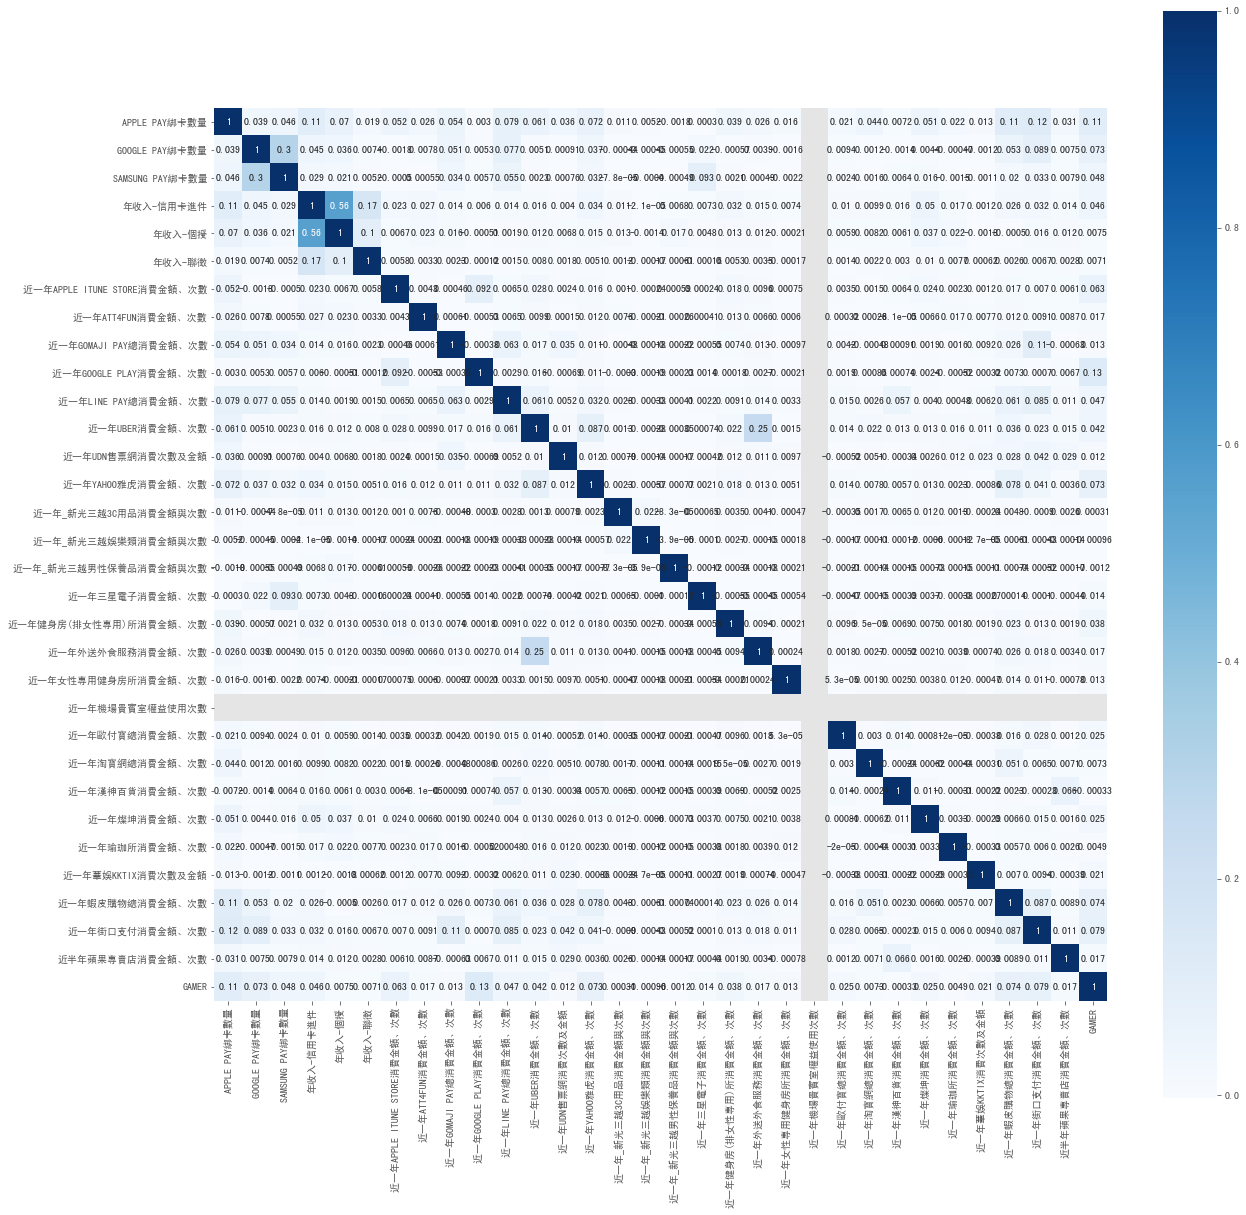

In [86]:
X_test_corr = X_test[:].corr()
import seaborn as sns
plt.rcParams['font.family']='SimHei' #顯示中文 
plt.figure(figsize=(20,20))
sns.heatmap(X_test_corr, square=True, annot=True, cmap='Blues')
plt.show()

## Features Selection

### Removing features with low variance

In [87]:
from sklearn.feature_selection import VarianceThreshold

In [92]:
sel = VarianceThreshold(threshold=(.7 * (1 - .3)))
sel.fit_transform(X_test.iloc[:,1:])

array([[288000., 276480.,      0., ...,      0.,      0.,      0.],
       [300000., 288000., 250000., ...,      0.,      0.,      0.],
       [500000., 768000., 500000., ...,      0.,      0.,      0.],
       ...,
       [900000., 848640., 867000., ...,      0.,      0.,      0.],
       [     0., 211200.,      0., ...,      0.,      0.,      0.],
       [952000., 913920., 750000., ...,      0.,      0.,      0.]])

In [93]:
cols_OK = sel.get_support() 
cols_OK

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [94]:
X_test2 = X_test.loc[:,cols_OK]

In [95]:
X_test2.columns.values

array(['SAMSUNG PAY綁卡數量', '年收入-信用卡進件', '年收入-個授', '年收入-聯徵',
       '近一年APPLE ITUNE STORE消費金額、次數', '近一年ATT4FUN消費金額、次數',
       '近一年GOMAJI PAY總消費金額、次數', '近一年GOOGLE PLAY消費金額、次數',
       '近一年LINE PAY總消費金額、次數', '近一年UBER消費金額、次數', '近一年UDN售票網消費次數及金額',
       '近一年YAHOO雅虎消費金額、次數', '近一年_新光三越3C用品消費金額與次數', '近一年_新光三越娛樂類消費金額與次數',
       '近一年_新光三越男性保養品消費金額與次數', '近一年三星電子消費金額、次數', '近一年健身房(排女性專用)所消費金額、次數',
       '近一年外送外食服務消費金額、次數', '近一年機場貴賓室權益使用次數', '近一年歐付寶總消費金額、次數',
       '近一年淘寶網總消費金額、次數', '近一年漢神百貨消費金額、次數', '近一年燦坤消費金額、次數',
       '近一年瑜珈所消費金額、次數', '近一年華娛KKTIX消費次數及金額', '近一年蝦皮購物總消費金額、次數',
       '近一年街口支付消費金額、次數'], dtype=object)

### Univariate feature selection

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [97]:
y_test = X_test['GAMER']

In [99]:
X, y = X_test.iloc[:,1:32], y_test
X.iloc[:,0:]

,APPLE PAY綁卡數量,GOOGLE PAY綁卡數量,SAMSUNG PAY綁卡數量,年收入-信用卡進件,年收入-個授,年收入-聯徵,近一年APPLE ITUNE STORE消費金額、次數,近一年ATT4FUN消費金額、次數,近一年GOMAJI PAY總消費金額、次數,近一年GOOGLE PLAY消費金額、次數,近一年LINE PAY總消費金額、次數,近一年UBER消費金額、次數,近一年UDN售票網消費次數及金額,近一年YAHOO雅虎消費金額、次數,近一年_新光三越3C用品消費金額與次數,近一年_新光三越娛樂類消費金額與次數,近一年_新光三越男性保養品消費金額與次數,近一年三星電子消費金額、次數,近一年健身房(排女性專用)所消費金額、次數,近一年外送外食服務消費金額、次數,近一年女性專用健身房所消費金額、次數,近一年機場貴賓室權益使用次數,近一年歐付寶總消費金額、次數,近一年淘寶網總消費金額、次數,近一年漢神百貨消費金額、次數,近一年燦坤消費金額、次數,近一年瑜珈所消費金額、次數,近一年華娛KKTIX消費次數及金額,近一年蝦皮購物總消費金額、次數,近一年街口支付消費金額、次數,近半年蘋果專賣店消費金額、次數
1778293,0.0,0.0,0.0,288000.0,276480.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401946,0.0,0.0,0.0,300000.0,288000.00,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
979108,0.0,0.0,0.0,500000.0,768000.00,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1675791,0.0,0.0,0.0,639000.0,613440.00,639000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3866391,0.0,0.0,0.0,0.0,1440000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3465655,0.0,0.0,0.0,260000.0,1037548.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997703,0.0,0.0,0.0,700000.0,402921.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113217,0.0,0.0,0.0,300000.0,288000.00,330000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2092344,0.0,0.0,0.0,0.0,528000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
652424,0.0,0.0,0.0,340000.0,326400.00,400000.0,0.0,0.0,0.0,0.0,0.0,1004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,478.0,0.0,0.0


In [100]:
sel = SelectKBest(chi2, k=20)
X_new = sel.fit_transform(X, y)
X_new.shape

(80562, 20)

In [101]:
cols_OK = sel.get_support() 

In [103]:
X_test_chi = X_test.loc[:,cols_OK]

In [104]:
X_test_chi['GAMER'] = X_test['GAMER']

/Users/aaron/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
X_test_chi.head(3)

,SAMSUNG PAY綁卡數量,年收入-信用卡進件,年收入-個授,年收入-聯徵,近一年APPLE ITUNE STORE消費金額、次數,近一年GOMAJI PAY總消費金額、次數,近一年GOOGLE PLAY消費金額、次數,近一年LINE PAY總消費金額、次數,近一年UDN售票網消費次數及金額,近一年_新光三越男性保養品消費金額與次數,近一年三星電子消費金額、次數,近一年健身房(排女性專用)所消費金額、次數,近一年外送外食服務消費金額、次數,近一年機場貴賓室權益使用次數,近一年歐付寶總消費金額、次數,近一年漢神百貨消費金額、次數,近一年瑜珈所消費金額、次數,近一年華娛KKTIX消費次數及金額,近一年蝦皮購物總消費金額、次數,近一年街口支付消費金額、次數,GAMER
1778293,0.0,288000.0,276480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
401946,0.0,300000.0,288000.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
979108,0.0,500000.0,768000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [106]:
X_test_chi.corr().round(3).style.apply(highlight_highcorr)

,SAMSUNG PAY綁卡數量,年收入-信用卡進件,年收入-個授,年收入-聯徵,近一年APPLE ITUNE STORE消費金額、次數,近一年GOMAJI PAY總消費金額、次數,近一年GOOGLE PLAY消費金額、次數,近一年LINE PAY總消費金額、次數,近一年UDN售票網消費次數及金額,近一年_新光三越男性保養品消費金額與次數,近一年三星電子消費金額、次數,近一年健身房(排女性專用)所消費金額、次數,近一年外送外食服務消費金額、次數,近一年機場貴賓室權益使用次數,近一年歐付寶總消費金額、次數,近一年漢神百貨消費金額、次數,近一年瑜珈所消費金額、次數,近一年華娛KKTIX消費次數及金額,近一年蝦皮購物總消費金額、次數,近一年街口支付消費金額、次數,GAMER
SAMSUNG PAY綁卡數量,1,0.029,0.021,0.005,-0,0.034,0.006,0.055,0.001,-0,0.093,0.002,0,nan,0.002,0.006,-0.002,-0.001,0.02,0.033,0.048
年收入-信用卡進件,0.029,1,0.56,0.166,0.023,0.014,0.006,0.014,0.004,0.007,0.007,0.032,0.015,nan,0.01,0.016,0.017,0.001,0.026,0.032,0.046
年收入-個授,0.021,0.56,1,0.102,0.007,0.016,-0.001,0.002,0.007,0.017,0.005,0.013,0.012,nan,0.006,0.006,0.022,-0.002,-0,0.016,0.007
年收入-聯徵,0.005,0.166,0.102,1,0.006,0.002,-0,0.002,0.002,-0.001,-0,0.005,0.003,nan,0.001,0.003,0.008,0.001,0.003,0.007,0.007
近一年APPLE ITUNE STORE消費金額、次數,-0,0.023,0.007,0.006,1,0,0.092,0.007,0.002,0.001,0,0.018,0.01,nan,0.003,0.006,0.002,0.001,0.017,0.007,0.063
近一年GOMAJI PAY總消費金額、次數,0.034,0.014,0.016,0.002,0,1,-0,0.063,0.035,-0,-0.001,0.007,0.013,nan,0.004,0.001,0.002,0.009,0.026,0.106,0.013
近一年GOOGLE PLAY消費金額、次數,0.006,0.006,-0.001,-0,0.092,-0,1,0.003,-0.001,-0,0.001,0,0.003,nan,0.002,0.001,-0.001,-0,0.007,0.001,0.127
近一年LINE PAY總消費金額、次數,0.055,0.014,0.002,0.002,0.007,0.063,0.003,1,0.005,-0,0.002,0.009,0.014,nan,0.015,0.057,0,0.006,0.061,0.085,0.047
近一年UDN售票網消費次數及金額,0.001,0.004,0.007,0.002,0.002,0.035,-0.001,0.005,1,-0,-0,0.012,0.011,nan,-0.001,-0,0.012,0.023,0.028,0.042,0.012
近一年_新光三越男性保養品消費金額與次數,-0,0.007,0.017,-0.001,0.001,-0,-0,-0,-0,1,-0,-0,-0,nan,-0,-0,-0,-0,-0.001,-0.001,-0.001


### Pipeline

In [109]:
# Authors: Robert McGibbon, Joel Nothman, Guillaume Lemaitre

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

print(__doc__)

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LinearSVC())
])

N_FEATURES_OPTIONS = [2, 4, 8, 15, 18]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
digits = load_digits()
grid.fit(X_test.iloc[:,1:], X_test.GAMER)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

Automatically created module for IPython interactive environment


KeyboardInterrupt: 

## 類別型標籤

In [112]:
gamer_tag = pd.read_csv(
                      '../data/gamer_tag.csv',
                       index_col=0
                      )
gamer_tag.shape

/Users/aaron/Documents/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(6201864, 3)

In [117]:
gamer_tag2 = pd.get_dummies(gamer_tag['TAG_VAL'])
gamer_tag2.head(n=5)

,01.夜貓族,02.晨型人,03.上班通勤,04.上班偷閒,05.午休,06.下午茶,07.下班通勤,08.家庭時間,09.睡前,APPLE PAY綁IPAD,APPLE PAY綁MACBOOK,ASUS手機使用者,F,GOGORO騎士,GOOGLE手機使用者,HCE VISA 御璽卡(001059),HTC手機使用者,M,OPPO手機使用者,SAMSUNG手機使用者,SONY手機使用者,三星電子使用者,中華電信繳費-金融卡,亞太電信繳費-金融卡,台北101下降戶,台灣大哥大繳費-金融卡,國泰航空世界卡(001081),小米手機使用者,廣三崇光百貨下降戶,有用Android進行金融卡消費,有用iPhone進行金融卡消費,橘子支付設定扣款,漢神巨蛋百貨流失但仍有其他百貨消費,漢神百貨忠誠戶,自行車愛好者,華為手機使用者,近半年透過RICHART申請信貸,追劇一族,遠傳繳費-金融卡,金融卡嘴饞一族,金融卡月月刷忠誠客戶,金融卡高級饕客一族,養生、有機食材愛好者,馬拉松(路跑)愛好者,高雄捷運通勤族
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
gamer_tag3 = pd.merge(gamer_tag, gamer_tag2, left_index=True, right_index = True)
gamer_tag3.head()

,CUST_ID,TAG_CD,TAG_VAL,01.夜貓族,02.晨型人,03.上班通勤,04.上班偷閒,05.午休,06.下午茶,07.下班通勤,08.家庭時間,09.睡前,APPLE PAY綁IPAD,APPLE PAY綁MACBOOK,ASUS手機使用者,F,GOGORO騎士,GOOGLE手機使用者,HCE VISA 御璽卡(001059),HTC手機使用者,M,OPPO手機使用者,SAMSUNG手機使用者,SONY手機使用者,三星電子使用者,中華電信繳費-金融卡,亞太電信繳費-金融卡,台北101下降戶,台灣大哥大繳費-金融卡,國泰航空世界卡(001081),小米手機使用者,廣三崇光百貨下降戶,有用Android進行金融卡消費,有用iPhone進行金融卡消費,橘子支付設定扣款,漢神巨蛋百貨流失但仍有其他百貨消費,漢神百貨忠誠戶,自行車愛好者,華為手機使用者,近半年透過RICHART申請信貸,追劇一族,遠傳繳費-金融卡,金融卡嘴饞一族,金融卡月月刷忠誠客戶,金融卡高級饕客一族,養生、有機食材愛好者,馬拉松(路跑)愛好者,高雄捷運通勤族
0,A2B52C60E5BD919BEB000E9EC44449D4,1010,SAMSUNG手機使用者,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,C88F7592881161ECBA0201393ACCBB01,166,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A5D015FCEE0826D97CDEA1AD44D052D4,1011,HTC手機使用者,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A5FBC9EFC41E9EE7ED3F5558A71B04FF,166,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,C822F7FF5B680AC15109276818A2229C,166,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
del gamer_tag,gamer_tag2
gc.collect()

205

In [119]:
gamer_tag4 = gamer_tag3.groupby(['CUST_ID']).sum().reset_index()
gamer_tag4.sample(10)

,CUST_ID,TAG_CD,01.夜貓族,02.晨型人,03.上班通勤,04.上班偷閒,05.午休,06.下午茶,07.下班通勤,08.家庭時間,09.睡前,APPLE PAY綁IPAD,APPLE PAY綁MACBOOK,ASUS手機使用者,F,GOGORO騎士,GOOGLE手機使用者,HCE VISA 御璽卡(001059),HTC手機使用者,M,OPPO手機使用者,SAMSUNG手機使用者,SONY手機使用者,三星電子使用者,中華電信繳費-金融卡,亞太電信繳費-金融卡,台北101下降戶,台灣大哥大繳費-金融卡,國泰航空世界卡(001081),小米手機使用者,廣三崇光百貨下降戶,有用Android進行金融卡消費,有用iPhone進行金融卡消費,橘子支付設定扣款,漢神巨蛋百貨流失但仍有其他百貨消費,漢神百貨忠誠戶,自行車愛好者,華為手機使用者,近半年透過RICHART申請信貸,追劇一族,遠傳繳費-金融卡,金融卡嘴饞一族,金融卡月月刷忠誠客戶,金融卡高級饕客一族,養生、有機食材愛好者,馬拉松(路跑)愛好者,高雄捷運通勤族
4027127,AD1AAC8B1DEE9D42DA2F131ABD20D60E,166,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3291317,8D78D5C1AFA173F33C7BDC731E6356C0,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2272320,61865E0349EBD246BF0D4605C239C6D9,166,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1297762,379968B05A88E782D4B21D23EA51DE56,166,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
890984,26167B09F3FAF929995E97D16281A1AB,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4010663,AC67B1C24F479134F15CEDC4EECB3665,166,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3152987,878E36B263A835D228CB1566F33F6170,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2296465,628DFF1DE5D1D524B723958A34A60121,166,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1849158,4F595E16B13D34D148CDEB497B6ADF33,2392,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1280114,36D609F9586E7206C60171479464BA29,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
gamer_tagv_data = pd.merge(gamer_tag4, gamer[['TAG_CD','CUST_ID']], how='left', on='CUST_ID')

In [124]:
gamer_tagv_data['GAMER'] = gamer_tagv_data['TAG_CD_y'].apply(lambda x: x==1352 or x==1353)

In [126]:
del gamer_tagv_data['TAG_CD_y'] 

In [127]:
gamer_tagv_data[:].corr().round(3).style.apply(highlight_highcorr)

,TAG_CD_x,01.夜貓族,02.晨型人,03.上班通勤,04.上班偷閒,05.午休,06.下午茶,07.下班通勤,08.家庭時間,09.睡前,APPLE PAY綁IPAD,APPLE PAY綁MACBOOK,ASUS手機使用者,F,GOGORO騎士,GOOGLE手機使用者,HCE VISA 御璽卡(001059),HTC手機使用者,M,OPPO手機使用者,SAMSUNG手機使用者,SONY手機使用者,三星電子使用者,中華電信繳費-金融卡,亞太電信繳費-金融卡,台北101下降戶,台灣大哥大繳費-金融卡,國泰航空世界卡(001081),小米手機使用者,廣三崇光百貨下降戶,有用Android進行金融卡消費,有用iPhone進行金融卡消費,橘子支付設定扣款,漢神巨蛋百貨流失但仍有其他百貨消費,漢神百貨忠誠戶,自行車愛好者,華為手機使用者,近半年透過RICHART申請信貸,追劇一族,遠傳繳費-金融卡,金融卡嘴饞一族,金融卡月月刷忠誠客戶,金融卡高級饕客一族,養生、有機食材愛好者,馬拉松(路跑)愛好者,高雄捷運通勤族,GAMER
TAG_CD_x,1,0.127,0.016,0.078,0.057,0.044,0.083,0.066,0.02,0.114,0.132,0.074,0.187,-0.009,0.175,0.073,0.184,0.27,0.009,0.092,0.46,0.228,0.132,0.045,0.02,0.13,0.074,0.093,0.123,0.154,0.041,0.06,0.067,0.323,0.113,0.209,0.119,0.05,0.477,0.074,0.082,0.076,0.072,0.269,0.276,0.015,0.158
01.夜貓族,0.127,1,-0,-0.002,-0.001,-0.001,-0.002,-0.002,-0,-0.003,0.015,0.013,0.012,-0.011,0.011,0.012,0.009,0.017,0.011,0.009,0.027,0.018,0.023,0.001,-0,0.008,0.001,0.007,0.009,0.005,0.001,-0,0.005,0.007,0.004,0.008,0.008,0.005,0.053,0.001,0.002,0.004,0.001,0.008,0.006,0.001,0.161
02.晨型人,0.016,-0,1,-0,-0,-0,-0,-0,-0,-0,0.002,-0,0.003,-0.001,0.001,-0,0.001,0,0.001,0.003,0.003,0.002,0.004,0.001,-0,-0,0.001,-0,-0,0.001,-0,-0,0.003,0.001,-0,-0,-0,-0,0.003,-0,-0,-0,-0,0.004,0.001,-0,0.019
03.上班通勤,0.078,-0.002,-0,1,-0.001,-0.001,-0.001,-0.001,-0,-0.002,0.007,0.002,0.003,0.004,0.007,0.003,0.002,0.008,-0.004,0.004,0.015,0.006,0.009,-0.001,-0,0.004,0.001,0.001,0.003,0.004,0,0,0.002,0.007,0.001,0.004,0.003,0.003,0.026,0.001,0,0.001,-0,0.005,0.008,-0,0.052
04.上班偷閒,0.057,-0.001,-0,-0.001,1,-0.001,-0.001,-0.001,-0,-0.001,0.007,0.002,0.006,0.004,0.006,0.002,0.003,0.005,-0.004,0.003,0.01,0.006,0.005,0.001,-0,0.002,-0,0.002,0.005,0.003,0,-0,0.002,0.005,0.003,0.001,0.005,0.001,0.017,0,-0,0.001,-0,0.006,0.007,0.001,0.032
05.午休,0.044,-0.001,-0,-0.001,-0.001,1,-0.001,-0.001,-0,-0.001,0.002,0.001,0.002,0.006,0.002,-0,0.003,0.005,-0.006,0.002,0.009,0.004,0.006,-0,0.001,0.003,0,0.002,0.003,0.002,-0,0.001,0.002,0.003,0.002,0.001,0.005,0.003,0.012,-0.001,-0,0,-0,0.003,0.003,0.002,0.033
06.下午茶,0.083,-0.002,-0,-0.001,-0.001,-0.001,1,-0.001,-0,-0.002,0.009,0.006,0.008,0.007,0.009,0.004,0.003,0.012,-0.007,0.004,0.016,0.006,0.01,-0.001,-0,0.004,-0,0.003,0.007,0.006,-0,0,0.001,0.007,0.003,0.004,0.005,0.004,0.026,0.001,-0.001,0,-0.001,0.007,0.007,0.002,0.054
07.下班通勤,0.066,-0.002,-0,-0.001,-0.001,-0.001,-0.001,1,-0,-0.001,0.007,0.004,0.006,0,0.007,0.002,0.005,0.009,-0,0.004,0.013,0.01,0.009,0,-0,0.004,-0,0.002,0.005,0.003,-0,-0,0.005,0.004,0.001,0.003,0.005,0.003,0.019,0,-0,0,0,0.003,0.005,0.002,0.071
08.家庭時間,0.02,-0,-0,-0,-0,-0,-0,-0,1,-0,0.002,-0,0.002,0.001,0,-0,-0,0.002,-0.001,0.002,0.005,0.002,0.002,-0,-0,0.003,-0,-0,-0,-0,-0,0,0.001,0.001,0.001,0.002,0.001,0.002,0.006,0,-0,-0.001,-0,-0,0,-0,0.02
09.睡前,0.114,-0.003,-0,-0.002,-0.001,-0.001,-0.002,-0.001,-0,1,0.011,0.008,0.015,0.003,0.008,0.01,0.007,0.02,-0.003,0.007,0.024,0.017,0.014,0.002,-0,0.005,0,0.002,0.009,0.005,0.002,0,0.003,0.008,0.003,0.005,0.009,0.005,0.036,0.002,0,0.002,0.001,0.008,0.011,0.001,0.104


In [142]:
gamer_tagv_data.shape

(5957233, 48)

In [148]:
for c in gamer_tagv_data.iloc[:,2:].columns:
    print("---- %s ---" % c)
    print( gamer_tagv_data[c].value_counts())

---- 01.夜貓族 ---
0    5941516
1      15717
Name: 01.夜貓族, dtype: int64
---- 02.晨型人 ---
0    5956849
1        384
Name: 02.晨型人, dtype: int64
---- 03.上班通勤 ---
0    5949573
1       7660
Name: 03.上班通勤, dtype: int64
---- 04.上班偷閒 ---
0    5953384
1       3849
Name: 04.上班偷閒, dtype: int64
---- 05.午休 ---
0    5954562
1       2671
Name: 05.午休, dtype: int64
---- 06.下午茶 ---
0    5949133
1       8100
Name: 06.下午茶, dtype: int64
---- 07.下班通勤 ---
0    5951922
1       5311
Name: 07.下班通勤, dtype: int64
---- 08.家庭時間 ---
0    5956689
1        544
Name: 08.家庭時間, dtype: int64
---- 09.睡前 ---
0    5943159
1      14074
Name: 09.睡前, dtype: int64
---- APPLE PAY綁IPAD ---
0    5953775
1       3458
Name: APPLE PAY綁IPAD, dtype: int64
---- APPLE PAY綁MACBOOK ---
0    5956234
1        999
Name: APPLE PAY綁MACBOOK, dtype: int64
---- ASUS手機使用者 ---
0    5952798
1       4435
Name: ASUS手機使用者, dtype: int64
---- F ---
1    3146530
0    2810703
Name: F, dtype: int64
---- GOGORO騎士 ---
0    5948815
1       8418
Name: GOGORO騎士, dtype

In [132]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.5 * (1 - .5)))
sel.fit_transform(gamer_tagv_data.iloc[:,1:])


array([[166.],
       [166.],
       [166.],
       ...,
       [166.],
       [166.],
       [166.]])

In [133]:
cols_OK = sel.get_support() 
cols_OK


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [134]:
X_test2 = X_test.loc[:,cols_OK]
X_test2.columns.values

array(['CUST_ID'], dtype=object)

In [143]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y_test = gamer_tagv_data['GAMER']

X, y = gamer_tagv_data.iloc[:,1:46], y_test
X.iloc[:,0:]



,TAG_CD_x,01.夜貓族,02.晨型人,03.上班通勤,04.上班偷閒,05.午休,06.下午茶,07.下班通勤,08.家庭時間,09.睡前,APPLE PAY綁IPAD,APPLE PAY綁MACBOOK,ASUS手機使用者,F,GOGORO騎士,GOOGLE手機使用者,HCE VISA 御璽卡(001059),HTC手機使用者,M,OPPO手機使用者,SAMSUNG手機使用者,SONY手機使用者,三星電子使用者,中華電信繳費-金融卡,亞太電信繳費-金融卡,台北101下降戶,台灣大哥大繳費-金融卡,國泰航空世界卡(001081),小米手機使用者,廣三崇光百貨下降戶,有用Android進行金融卡消費,有用iPhone進行金融卡消費,橘子支付設定扣款,漢神巨蛋百貨流失但仍有其他百貨消費,漢神百貨忠誠戶,自行車愛好者,華為手機使用者,近半年透過RICHART申請信貸,追劇一族,遠傳繳費-金融卡,金融卡嘴饞一族,金融卡月月刷忠誠客戶,金融卡高級饕客一族,養生、有機食材愛好者,馬拉松(路跑)愛好者
0,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,166,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,166,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,166,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
sel = SelectKBest(chi2, k=20)
X_new = sel.fit_transform(X, y)
X_new.shape



(5957233, 20)

In [ ]:
cols_OK = sel.get_support() 


X_test_chi = X_test.loc[:,cols_OK]
In [104]:

X_test_chi['GAMER'] = X_test['GAMER']

優化記憶體使用

In [119]:
test = airticket['TAG_VAL'].str.isnumeric()

In [19]:
airticket['TAG_VAL2'] = airticket['TAG_VAL'].astype(str)

In [20]:
airticket2 = airticket[~airticket['TAG_VAL2'].str.isnumeric()]
airticket2.sample(20)

,CUST_ID,TAG_CD,TAG_VAL,TAG_VAL2
16737904,BD1CF9079CE786AEC69C364E5C3DA5E8,00000422,名下有房子,名下有房子
19027494,9FF323BD2E58CCBF4296478E499DBAF2,00001244,新光三越御璽卡 (001544),新光三越御璽卡 (001544)
14100032,6CA7FBC03EE8AC22DA8B2693EF28021E,00000171,05.高中高職,05.高中高職
3696115,699ECED532B01A07D3EBC13C6FD3A215,00000166,M,M
13099773,03ACF48496EC3A75B5EFDDB813712340,00000171,05.高中高職,05.高中高職
3249610,0884478860B92AA523BE3B267494AF51,00000166,F,F
18592529,0671D13191F1B1DC3A216B553C78C3EE,00000422,名下有房子,名下有房子
16317442,8EF8E4AFC80AE9A417BCE1C06D8485F8,00000379,果粉,果粉
19934202,74A00F88E220DB7AD45E9F155BB1444F,00001399,持外幣帳戶,持外幣帳戶
18627340,11842EC3C7AC7C88842E867C1DE1C65A,00001260,ａＧｏＧｏicash御璽卡(001050),ａＧｏＧｏicash御璽卡(001050)


In [177]:
airticket_num_ml2_2 = airticket_num_ml.pivot_table(index='CUST_ID', columns='TAG_NM',values='TXN_CNT').reset_index()

In [178]:
airticket_num_ml2_2.sample(n=5)

TAG_NM,CUST_ID,近一年CITY LINK內湖店消費金額、次數_金融卡,近一年信用卡消費國家(不含台灣)數,近一年國際線航空、租車消費金額、次數_信用卡,近一年國際線航空、租車消費金額、次數_金融卡,近一年搭廉航消費總金額、次數_信用卡,近一年搭廉航消費總金額、次數_金融卡,近一年機場停車權益使用總停車天數及次數,近一年機場叫車接送消費金額、次數_信用卡,近一年機場貴賓室權益使用次數,近一年海外消費刷卡天數、金額(不含網路交易)_信用卡,近一年租借WIFI機消費金額、次數_信用卡,近一年辦護照消費金額、次數_信用卡,近一年辦護照消費金額、次數_金融卡,近一年金融卡消費國家(不含台灣)數,近四年信用卡01月份國外消費次數,近四年信用卡02月份國外消費次數,近四年信用卡03月份國外消費次數,近四年信用卡04月份國外消費次數,近四年信用卡05月份國外消費次數,近四年信用卡06月份國外消費次數,近四年信用卡07月份國外消費次數,近四年信用卡08月份國外消費次數,近四年信用卡09月份國外消費次數,近四年信用卡10月份國外消費次數,近四年信用卡11月份國外消費次數,近四年信用卡12月份國外消費次數,近四年信用卡消費國家(不含台灣)數
221458,55E82B7B7D1B73D218C9A523EF306EB0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
24150,093A3DC4E9D23F75943FDA6C534D6C12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0
598647,E88BD121B670EF2CAD2E2DAB61830896,NaN,1.0,14.0,NaN,NaN,NaN,2.0,NaN,NaN,36.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0
240413,5D3D0040F262D7DD5EAE1B2BC25CB5DA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
325252,7E4B6E9D6F33EFEC49CEAA2CED223417,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
for i in airticket_num_ml2_2.iloc[:,1:].columns.values:
    str = i+"_CNT"
    airticket_num_ml2_2.rename(columns={i:str},inplace=True)

In [180]:
airticket_num_ml2_2.sample(n=5)

TAG_NM,CUST_ID,近一年CITY LINK內湖店消費金額、次數_金融卡_CNT,近一年信用卡消費國家(不含台灣)數_CNT,近一年國際線航空、租車消費金額、次數_信用卡_CNT,近一年國際線航空、租車消費金額、次數_金融卡_CNT,近一年搭廉航消費總金額、次數_信用卡_CNT,近一年搭廉航消費總金額、次數_金融卡_CNT,近一年機場停車權益使用總停車天數及次數_CNT,近一年機場叫車接送消費金額、次數_信用卡_CNT,近一年機場貴賓室權益使用次數_CNT,近一年海外消費刷卡天數、金額(不含網路交易)_信用卡_CNT,近一年租借WIFI機消費金額、次數_信用卡_CNT,近一年辦護照消費金額、次數_信用卡_CNT,近一年辦護照消費金額、次數_金融卡_CNT,近一年金融卡消費國家(不含台灣)數_CNT,近四年信用卡01月份國外消費次數_CNT,近四年信用卡02月份國外消費次數_CNT,近四年信用卡03月份國外消費次數_CNT,近四年信用卡04月份國外消費次數_CNT,近四年信用卡05月份國外消費次數_CNT,近四年信用卡06月份國外消費次數_CNT,近四年信用卡07月份國外消費次數_CNT,近四年信用卡08月份國外消費次數_CNT,近四年信用卡09月份國外消費次數_CNT,近四年信用卡10月份國外消費次數_CNT,近四年信用卡11月份國外消費次數_CNT,近四年信用卡12月份國外消費次數_CNT,近四年信用卡消費國家(不含台灣)數_CNT
196381,4C1560527BB72301F87AEB57E3B5DAEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
357476,8AD4957AA4EC17621E152048DCD62657,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105336,288B7836BC453A58A4ED0C786D735FFE,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
505759,C494B11BD043544CEED294C217CB2879,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
476580,B9321F2176918F3000AD9508CA7A189D,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0


In [230]:
airticket_num_ml2.shape

(658814, 28)

In [182]:
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1))
    return ['background-color: yellow' if v else '' for v in is_high]

In [261]:
airticket_num_ml2[:].corr().style.apply(highlight_highcorr)

TAG_NM,近一年CITY LINK內湖店消費金額、次數_金融卡,近一年信用卡消費國家(不含台灣)數,近一年國際線航空、租車消費金額、次數_信用卡,近一年國際線航空、租車消費金額、次數_金融卡,近一年搭廉航消費總金額、次數_信用卡,近一年搭廉航消費總金額、次數_金融卡,近一年機場停車權益使用總停車天數及次數,近一年機場叫車接送消費金額、次數_信用卡,近一年機場貴賓室權益使用次數,近一年海外消費刷卡天數、金額(不含網路交易)_信用卡,近一年租借WIFI機消費金額、次數_信用卡,近一年辦護照消費金額、次數_信用卡,近一年辦護照消費金額、次數_金融卡,近一年金融卡消費國家(不含台灣)數,近四年信用卡01月份國外消費次數,近四年信用卡02月份國外消費次數,近四年信用卡03月份國外消費次數,近四年信用卡04月份國外消費次數,近四年信用卡05月份國外消費次數,近四年信用卡06月份國外消費次數,近四年信用卡07月份國外消費次數,近四年信用卡08月份國外消費次數,近四年信用卡09月份國外消費次數,近四年信用卡10月份國外消費次數,近四年信用卡11月份國外消費次數,近四年信用卡12月份國外消費次數,近四年信用卡消費國家(不含台灣)數
TAG_NM,,,,,,,,,,,,,,,,,,,,,,,,,,,
近一年CITY LINK內湖店消費金額、次數_金融卡,1,0.734502,nan,0.415791,nan,-1,nan,nan,nan,0.743033,nan,nan,nan,0.738983,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.26747
近一年信用卡消費國家(不含台灣)數,0.734502,1,0.214282,0.0465467,0.0438375,0.159057,0.215382,0.0714511,nan,0.229354,0.0453724,0.0525452,0.724716,0.186558,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.744027
近一年國際線航空、租車消費金額、次數_信用卡,nan,0.214282,1,0.105164,0.498563,0.0311025,0.14431,0.0513164,nan,0.160411,0.0499216,0.0214911,0.757281,0.0911821,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.178798
近一年國際線航空、租車消費金額、次數_金融卡,0.415791,0.0465467,0.105164,1,0.0500866,0.372113,0.275635,0.36134,nan,0.0152906,0.209324,-0.269427,-0.176939,0.215183,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0620598
近一年搭廉航消費總金額、次數_信用卡,nan,0.0438375,0.498563,0.0500866,1,0.0375255,0.0903832,0.0892414,nan,0.141668,0.0335099,0.00323383,0.283178,0.0131513,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0234509
近一年搭廉航消費總金額、次數_金融卡,-1,0.159057,0.0311025,0.372113,0.0375255,1,-0.195145,-0.00989297,nan,-0.00199434,-0.112269,-0.642921,-0.257804,0.0589155,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.133483
近一年機場停車權益使用總停車天數及次數,nan,0.215382,0.14431,0.275635,0.0903832,-0.195145,1,-0.0212238,nan,0.144363,0.111433,0.054107,nan,0.218098,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.218162
近一年機場叫車接送消費金額、次數_信用卡,nan,0.0714511,0.0513164,0.36134,0.0892414,-0.00989297,-0.0212238,1,nan,0.0882865,-0.0148695,0.0932625,nan,-0.114997,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.117926
近一年機場貴賓室權益使用次數,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [262]:
airticket_num_ml2_2[:].corr().round(3).style.apply(highlight_highcorr)

TAG_NM,近一年CITY LINK內湖店消費金額、次數_金融卡_CNT,近一年信用卡消費國家(不含台灣)數_CNT,近一年國際線航空、租車消費金額、次數_信用卡_CNT,近一年國際線航空、租車消費金額、次數_金融卡_CNT,近一年搭廉航消費總金額、次數_信用卡_CNT,近一年搭廉航消費總金額、次數_金融卡_CNT,近一年機場停車權益使用總停車天數及次數_CNT,近一年機場叫車接送消費金額、次數_信用卡_CNT,近一年機場貴賓室權益使用次數_CNT,近一年海外消費刷卡天數、金額(不含網路交易)_信用卡_CNT,近一年租借WIFI機消費金額、次數_信用卡_CNT,近一年辦護照消費金額、次數_信用卡_CNT,近一年辦護照消費金額、次數_金融卡_CNT,近一年金融卡消費國家(不含台灣)數_CNT,近四年信用卡01月份國外消費次數_CNT,近四年信用卡02月份國外消費次數_CNT,近四年信用卡03月份國外消費次數_CNT,近四年信用卡04月份國外消費次數_CNT,近四年信用卡05月份國外消費次數_CNT,近四年信用卡06月份國外消費次數_CNT,近四年信用卡07月份國外消費次數_CNT,近四年信用卡08月份國外消費次數_CNT,近四年信用卡09月份國外消費次數_CNT,近四年信用卡10月份國外消費次數_CNT,近四年信用卡11月份國外消費次數_CNT,近四年信用卡12月份國外消費次數_CNT,近四年信用卡消費國家(不含台灣)數_CNT
TAG_NM,,,,,,,,,,,,,,,,,,,,,,,,,,,
近一年CITY LINK內湖店消費金額、次數_金融卡_CNT,1,nan,nan,0.957,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
近一年信用卡消費國家(不含台灣)數_CNT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
近一年國際線航空、租車消費金額、次數_信用卡_CNT,nan,nan,1,0.072,0.689,0.179,0.288,0.145,0.222,0.274,0.155,0.005,nan,nan,0.201,0.189,0.221,0.213,0.214,0.18,0.171,0.195,0.2,0.197,0.181,0.187,nan
近一年國際線航空、租車消費金額、次數_金融卡_CNT,0.957,nan,0.072,1,0.18,0.622,0.273,-0.017,-0.222,0.033,0.183,nan,nan,nan,-0.046,0.051,-0.062,-0.01,-0.028,-0.005,-0.046,0.05,-0.001,0.015,-0.028,0.051,nan
近一年搭廉航消費總金額、次數_信用卡_CNT,nan,nan,0.689,0.18,1,0.264,0.148,0.138,0.244,0.154,0.193,-0.02,nan,nan,0.129,0.081,0.122,0.119,0.102,0.034,0.068,0.081,0.082,0.095,0.091,0.106,nan
近一年搭廉航消費總金額、次數_金融卡_CNT,nan,nan,0.179,0.622,0.264,1,-0.122,0.277,nan,0.104,-0.069,nan,nan,nan,-0.002,-0.055,-0.007,0.089,0.021,-0.083,-0.056,-0.059,0.207,0.146,0.032,0.067,nan
近一年機場停車權益使用總停車天數及次數_CNT,nan,nan,0.288,0.273,0.148,-0.122,1,0.04,0.419,0.243,0.167,-0.019,nan,nan,0.252,0.213,0.256,0.244,0.257,0.236,0.213,0.226,0.243,0.257,0.244,0.243,nan
近一年機場叫車接送消費金額、次數_信用卡_CNT,nan,nan,0.145,-0.017,0.138,0.277,0.04,1,0.168,0.136,0.155,-0.052,nan,nan,0.118,0.155,0.127,0.146,0.146,0.145,0.113,0.096,0.132,0.135,0.148,0.13,nan
近一年機場貴賓室權益使用次數_CNT,nan,nan,0.222,-0.222,0.244,nan,0.419,0.168,1,0.163,0.171,-0.022,nan,nan,0.118,0.094,0.119,0.117,0.129,0.072,0.079,0.085,0.094,0.105,0.087,0.093,nan


In [270]:
airticket3 = pd.get_dummies(airticket2['TAG_VAL2'])
airticket3.columns.values

array(['01.博士', '01.可能住國外', '02.大部份時間在國外', '02.碩士', '03.國內國外時間各半', '03.大學',
       '04.專科', '04.較常出國', '05.偶爾出國', '05.高中高職', '06.其他', 'AUDI',
       'BMW/保時捷', 'DAIHATSU', 'F', 'HONDA', 'HYUNDAI', 'LUXGEN', 'M',
       'MAZDA', 'NISSAN', 'NISSAN/INFINITI', 'PEUGEOT', 'SAAB', 'SKODA',
       'SUBARU', 'SUZUKI', 'TOYOTA/LEXUS', 'VOLVO', '三菱',
       '三越一卡通VISA御璽卡(001523)', '名下有房子', '唸貴族學校刷信用卡', '唸貴族學校刷金融卡',
       '多持大潤發御璽卡', '多持新光三越御璽卡', '多持昇恆昌御璽卡', '多持ａＧｏＧｏ御璽卡', '夢想實踐者',
       '大潤發VISA御璽卡(001752)', '大潤發悠遊御璽卡(001748)', '子女在學中', '家有需照護者', '小資族',
       '持外幣帳戶', '新光三越icash御璽卡(001089)', '新光三越御璽卡 (001544)',
       '新光三越悠遊御璽卡 (001737)', '昇恆昌悠遊御璽卡(001761)', '昇恆昌悠遊白金卡(001734)',
       '昇恆昌無限悠遊卡(001013)', '昇恒昌聯名御璽卡(001518)', '昇恒昌聯名普卡(001524)',
       '昇恒昌聯名白金卡(001522)', '月光族', '有汽車一族', '果粉', '法拉利/瑪莎拉蒂', '特斯拉', '福斯',
       '福特', '自行車愛好者', '藍寶堅尼', '語言學習愛好', '貨車', '賓士', '高薪月光族',
       'ａＧｏＧｏicash御璽卡(001050)', 'ａＧｏＧｏ悠遊御璽(001077)', 'ａＧｏＧｏ虛擬御璽卡(001078)'], dtype=object)

In [30]:
airticket_ml = pd.merge(airticket2, airticket3, left_index=True, right_index = True)
airticket_ml.head()

,CUST_ID,TAG_CD,TAG_VAL,TAG_VAL2,01.博士,01.可能住國外,02.大部份時間在國外,02.碩士,03.國內國外時間各半,03.大學,04.專科,04.較常出國,05.偶爾出國,05.高中高職,06.其他,AUDI,BMW/保時捷,DAIHATSU,F,HONDA,HYUNDAI,LUXGEN,M,MAZDA,NISSAN,...,新光三越icash御璽卡(001089),新光三越御璽卡 (001544),新光三越悠遊御璽卡 (001737),昇恆昌悠遊御璽卡(001761),昇恆昌悠遊白金卡(001734),昇恆昌無限悠遊卡(001013),昇恒昌聯名御璽卡(001518),昇恒昌聯名普卡(001524),昇恒昌聯名白金卡(001522),月光族,有汽車一族,果粉,法拉利/瑪莎拉蒂,特斯拉,福斯,福特,自行車愛好者,藍寶堅尼,語言學習愛好,貨車,賓士,高薪月光族,ａＧｏＧｏicash御璽卡(001050),ａＧｏＧｏ悠遊御璽(001077),ａＧｏＧｏ虛擬御璽卡(001078)
0,8B6F106D5358B3FDA1EAABDF8AB71FC3,00000003,子女在學中,子女在學中,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8B6F9E92DF651D030397AC403D2000C4,00000003,子女在學中,子女在學中,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8B72D4A3113D3E1B7EA4B81143689340,00000003,子女在學中,子女在學中,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8B72E19D50D8791A9C73C13A1ACE25D9,00000003,子女在學中,子女在學中,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8B72E603F451281A0B74994A0CEBFDA5,00000003,子女在學中,子女在學中,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
airticket_ml2 = airticket_ml.groupby(['CUST_ID']).sum().reset_index()

In [33]:
airticket_ml2.shape

(5966278, 71)

In [34]:
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1))
    return ['background-color: yellow' if v else '' for v in is_high]

In [35]:
airticket_ml2[:].corr().round(3).style.apply(highlight_highcorr)

,01.博士,01.可能住國外,02.大部份時間在國外,02.碩士,03.國內國外時間各半,03.大學,04.專科,04.較常出國,05.偶爾出國,05.高中高職,06.其他,AUDI,BMW/保時捷,DAIHATSU,F,HONDA,HYUNDAI,LUXGEN,M,MAZDA,NISSAN,NISSAN/INFINITI,PEUGEOT,SAAB,SKODA,SUBARU,SUZUKI,TOYOTA/LEXUS,VOLVO,三菱,三越一卡通VISA御璽卡(001523),名下有房子,唸貴族學校刷信用卡,唸貴族學校刷金融卡,多持大潤發御璽卡,多持新光三越御璽卡,多持昇恆昌御璽卡,多持ａＧｏＧｏ御璽卡,夢想實踐者,大潤發VISA御璽卡(001752),大潤發悠遊御璽卡(001748),子女在學中,家有需照護者,小資族,持外幣帳戶,新光三越icash御璽卡(001089),新光三越御璽卡 (001544),新光三越悠遊御璽卡 (001737),昇恆昌悠遊御璽卡(001761),昇恆昌悠遊白金卡(001734),昇恆昌無限悠遊卡(001013),昇恒昌聯名御璽卡(001518),昇恒昌聯名普卡(001524),昇恒昌聯名白金卡(001522),月光族,有汽車一族,果粉,法拉利/瑪莎拉蒂,特斯拉,福斯,福特,自行車愛好者,藍寶堅尼,語言學習愛好,貨車,賓士,高薪月光族,ａＧｏＧｏicash御璽卡(001050),ａＧｏＧｏ悠遊御璽(001077),ａＧｏＧｏ虛擬御璽卡(001078)
01.博士,1,0.002,0.005,-0.016,0.005,-0.034,-0.03,0.01,0.021,-0.036,-0.021,0.001,0.004,0.001,-0.032,0.004,0,0.001,0.033,0.005,0.006,0.003,0.002,0.003,0.001,0.003,0.002,0.016,0.005,0.004,0.003,0.037,0.01,-0,-0,0.001,-0,0.006,-0.003,0.006,0.009,0.02,0,-0.01,0.01,0.002,0.009,0.012,0.008,0.001,0.009,0.01,0.001,0.004,-0.003,0.036,0.013,0.001,0.002,0.008,0.006,0.003,-0,0.008,0.001,0.008,0.001,0.006,0.01,0.003
01.可能住國外,0.002,1,-0,0.007,-0.001,0.011,0.002,-0.001,-0.002,-0.002,-0.001,-0,-0.001,-0,0.002,-0.001,-0,-0.001,-0.002,-0.001,-0.001,-0.001,-0,-0,-0,-0,-0,-0.002,0,-0.001,0,0.006,-0,-0,-0,-0,-0,-0,-0,-0.001,-0.001,-0,-0,0.006,0.005,-0.001,0.002,0,0.012,0.002,0,0.013,0.001,0.004,-0,-0,0.01,-0,-0,-0,-0,0,-0,-0,-0,-0.001,-0,0,0.001,0.005
02.大部份時間在國外,0.005,-0,1,0.012,-0.001,0.016,0.001,-0.001,-0.002,-0.004,-0.001,-0,0.001,-0,0.003,-0.001,-0,0,-0.003,-0,-0.001,-0,-0,0.001,-0,-0,-0,-0.001,0,-0.001,0,0.009,0.001,-0,-0,-0,-0,0.001,0,-0,-0.002,0.001,-0,0.009,0.008,0,0.005,0.004,0.022,0.005,0.007,0.033,0.002,0.012,-0.001,0.002,0.021,0.001,-0,-0,-0,0,-0,0.001,-0,0.001,-0,0.001,0.002,0.001
02.碩士,-0.016,0.007,0.012,1,0.019,-0.109,-0.098,0.028,0.064,-0.115,-0.067,0.002,0.013,0.001,-0.055,0.014,0.001,0.006,0.057,0.02,0.013,0.008,0.005,0.001,0.006,0.006,0.011,0.027,0.012,0.007,0.017,0.083,0.017,0.001,0,0.005,0.001,0.063,-0.005,0.01,0.017,0.038,0.001,0.031,0.038,0.018,0.034,0.049,0.034,0.005,0.027,0.043,0.002,0.019,-0.006,0.077,0.101,0.003,0.006,0.022,0.015,0.008,0.001,0.017,-0.001,0.016,0,0.097,0.112,0.022
03.國內國外時間各半,0.005,-0.001,-0.001,0.019,1,0.024,0.003,-0.002,-0.004,-0.005,-0.002,0.001,0.004,-0,0.007,0,0,-0,-0.007,0.002,0.002,0,-0,0.001,-0,-0,0.001,0.003,0.001,0.001,0,0.016,0.005,-0,-0,0.001,-0,0.001,-0.001,-0.001,-0.002,0.007,-0,0.012,0.013,0.001,0.012,0.01,0.039,0.008,0.019,0.059,0.004,0.019,-0.001,0.011,0.039,0.003,0.004,0.002,0.001,0.003,-0,0.003,-0,0.005,0,0.004,0.006,0.002
03.大學,-0.034,0.011,0.016,-0.109,0.024,1,-0.212,0.034,0.06,-0.25,-0.145,0.003,0.01,0,0.039,0.016,0.003,0.009,-0.035,0.014,0.015,0.011,0.005,0.002,0.003,0.006,0.01,0.025,0.008,0.009,0.032,0.077,0.012,-0,0,0.006,0.002,0.063,-0,0.014,0.027,0.038,0.001,0.243,0.039,0.03,0.068,0.104,0.055,0.028,0.013,0.057,0.011,0.042,0.002,0.09,0.185,0.002,0.003,0.017,0.015,0.009,0.001,0.018,0,0.013,-0,0.131,0.15,0.027
04.專科,-0.03,0.002,0.001,-0.098,0.003,-0.212,1,0.004,0.006,-0.223,-0.129,0.001,0.007,0.002,0.03,0.01,0.003,0.008,-0.026,0.005,0.012,0.011,0.001,0.001,0,0.003,0.003,0.029,0.004,0.014,0.002,0.083,0.013,-0,0,0,0,-0.016,-0.018,0.008,0.01,0.047,0.001,-0.05,-0.026,-0,0.033,0.02,0.002,-0.001,-0.002,0.012,0.003,0.007,-0.009,0.07,-0.019,0.001,-0.001,0.008,0.007,0.005,0,0.012,0.002,0.011,0,-0.024,-0.027,-0.004
04.較常出國,0.01,-0.001,-0.001,0.028,-0.002,0.034,0.004,1,-0.006,-0.009,-0.003,0.003,0.016,0,0.011,0.004,0.001,0.003,-0.01,0.005,0.005,0.004,0.002,0.001,0.002,0.002,0.003,0.011,0.007,0.002,0.002,0.024,0.012,-0,-0,0.001,0.002,0.007,-0,-0,-0.002,0.02,-0,0.019,0.019,0.003,0.021,0.017,0.049,0.011,0.045,0.071,0.004,0.022,-0,0.027,0.063,0.009,0.003,0.007,0.003,0.007,0.007,0.009,-0,0.017,-0,0.01,0.015,0.003
05.偶爾出國,0.021,-0.002,-0.002,0.064,-0.004,0.06,0.006,-0.006,1,-0.023,-0.004,0.011,0.057,0.003,0.007,0.025,0.003,0.013,-0.006,0.024,0.021,0.016,0.008,0.005,0.01,0.012,0.015,0.052,0.028,0.013,0.006,0.05,0.039,-0,0.001,0.006,0.003,0.038,-0,0.004,0.001,0.073,

In [281]:
airticket_num_ml2.head()

TAG_NM,CUST_ID,近一年CITY LINK內湖店消費金額、次數_金融卡,近一年信用卡消費國家(不含台灣)數,近一年國際線航空、租車消費金額、次數_信用卡,近一年國際線航空、租車消費金額、次數_金融卡,近一年搭廉航消費總金額、次數_信用卡,近一年搭廉航消費總金額、次數_金融卡,近一年機場停車權益使用總停車天數及次數,近一年機場叫車接送消費金額、次數_信用卡,近一年機場貴賓室權益使用次數,近一年海外消費刷卡天數、金額(不含網路交易)_信用卡,近一年租借WIFI機消費金額、次數_信用卡,近一年辦護照消費金額、次數_信用卡,近一年辦護照消費金額、次數_金融卡,近一年金融卡消費國家(不含台灣)數,近四年信用卡01月份國外消費次數,近四年信用卡02月份國外消費次數,近四年信用卡03月份國外消費次數,近四年信用卡04月份國外消費次數,近四年信用卡05月份國外消費次數,近四年信用卡06月份國外消費次數,近四年信用卡07月份國外消費次數,近四年信用卡08月份國外消費次數,近四年信用卡09月份國外消費次數,近四年信用卡10月份國外消費次數,近四年信用卡11月份國外消費次數,近四年信用卡12月份國外消費次數,近四年信用卡消費國家(不含台灣)數
0,00002D9D61AB5C544395AB9123049938,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4198.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,00004802767EEFFA00EBB85E81441D9F,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,00004802767EEFFA81CEDEC3AC229852,NaN,NaN,9543.0,NaN,9543.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0
3,00004802767EEFFA835D54BD2897FC52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,00004802767EEFFA96AD0C88E0FD3FA6,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3516.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,12.0


In [285]:
airticket_all_ml = pd.merge(airticket_ml2, airticket_num_ml2, on='CUST_ID', how='left')

In [288]:
airticket_all_ml = pd.merge(airticket_all_ml, airticket_num_ml2_2, on='CUST_ID', how='left')

In [297]:
airticket_all_ml.to_csv('airticket_all_ml.csv')

In [295]:
    for index, row in airticket_all_ml.iterrows():
        if(row['近一年海外消費刷卡天數、金額(不含網路交易)_信用卡_TXN']> 0):
            airticket_all_ml.loc[index,'出國'] = 1

KeyboardInterrupt: 

In [294]:
airticket_all_ml['出國'] = airticket_all_ml[airticket_all_ml['近一年海外消費刷卡天數、金額(不含網路交易)_信用卡_TXN']>0]

ValueError: Wrong number of items passed 125, placement implies 1

In [ ]:
airticket_all_ml[:].corr().round(3).style.apply(highlight_highcorr)

In [28]:
car_tag_custcnt2 = pd.merge(car_tag_custcnt,tag_custcnt, how='inner', on='TAG_CD')

In [66]:
car_tag_custcnt3 = car_tag_custcnt2.groupby(['TAG_VAL','TAG_CD','CUST_CNT']).agg({'CAR_LOAN_CUSTID':'nunique'}).reset_index()

In [ ]:
car_tag_custcnt3.shape

In [ ]:
car_tag_custcnt2_test = car_tag_custcnt2
car_tag_custcnt2_test['Count'] = car_tag_custcnt2.groupby(['TAG_CD'])['CAR_LOAN_CUSTID'].transform('count')
car_tag_custcnt2_test.drop_duplicates()
car_tag_custcnt2_test.head()

In [67]:
car_tag_custcnt4 = pd.merge(car_tag_custcnt3,TAG_INFO, how='inner', on='TAG_CD')

In [68]:
car_tag_custcnt4['ratio'] = car_tag_custcnt4['CAR_LOAN_CUSTID'] / car_tag_custcnt4['CUST_CNT']

In [69]:
car_tag_custcnt4=car_tag_custcnt4.sort_values(['ratio','CAR_LOAN_CUSTID'], ascending=[False,False])

In [70]:
car_tag_custcnt5 = car_tag_custcnt4[['TAG_NM','TAG_VAL','L2','TAG_CD','CUST_CNT','CAR_LOAN_CUSTID','ratio']]

In [73]:
car_tag_custcnt5.to_csv('cp.csv')

In [16]:
car_tag_custcnt5.head(n=200)

NameError: name 'car_tag_custcnt5' is not defined

In [72]:
print(car_tag_custcnt5.head(n=200).to_string())

                                       TAG_NM                                 TAG_VAL                   L2    TAG_CD  CUST_CNT  CAR_LOAN_CUSTID     ratio
47583                            信用卡正卡持有國泰航空卡                            信用卡正卡持有國泰航空卡            支付-持有-信用卡  00001350     30722            32829  1.068583
49108   國泰航空持卡人及員工-非國泰航空之航空案件不得接觸(排除用_勿拿來當母體)   國泰航空持卡人及員工-非國泰航空之航空案件不得接觸(排除用_勿拿來當母體)               禁銷-聯名卡  00001378     31532            33118  1.050298
49106                         信用卡正卡持有國泰航空-世界卡                         國泰航空世界卡(001081)            支付-持有-信用卡  00001328       417              422  1.011990
49110                         信用卡正卡持有國泰航空-鈦金卡                         國泰航空鈦金卡(001083)            支付-持有-信用卡  00001327     30442            28237  0.927567
49107                                  國泰航空員工                                  國泰航空員工             禁銷-聯名卡企業  00001379       515              270  0.524272
49109                         信用卡正卡持有國泰航空-鈦金卡                       國泰航空翱翔鈦金

In [54]:
car_tag_custcnt5.to_csv('car_tag_custcnt5.csv')

In [ ]:
query = """
select A.TAG_VAL, A.TAG_CD, count(distinct CUST_ID)AS CUST_CNT
FROM
(select CUST_ID,TAG_VAL,TAG_CD FROM dsmkt.ana_tag_attr_info)A
GROUP BY TAG_VAL, TAG_CD"""
tag_cust_cnt =pd.read_sql(query, con=con)

In [39]:
# read data 
query = """
select A.TAG_2 as TAG_VAL, A.CUST_ID 
From "1061116".j070406_eland_15times A,
(select CUST_ID from dsmkt.ana_tag_attr_info where tag_cd = 00001383 AND TAG_VAL='持車貸') B
WHERE A.CUST_ID = B.CUST_ID AND A.SCORE >=100
"""

car_eland_data = pd.read_sql(query, con=con)

In [40]:
eland_data = pd.read_sql(sql='select TAG_2 as TAG_VAL, CUST_ID from "1061116".j070406_eland_15times WHERE SCORE >= 100', con=con)

In [41]:
eland_data.shape

(4861936, 2)

In [42]:
eland_data2 = eland_data.groupby(['TAG_VAL']).agg({'CUST_ID':'nunique'}).reset_index()

In [ ]:
query = """
select B.TAG_CD, B.L2, B.TAG_NM 
From TAG_CNT A,
dsmkt.ana_tag_cd@anadbp01_dwdbp01 B
WHERE A.TAG_CD = B.TAG_CD
"""

tag_info = pd.read_sql(query, con=con2)

In [43]:
car_eland_data.head()

,TAG_VAL,CUST_ID
0,DIY手作/手工藝,CAE3AF639DFE25B4E7A63870D06314C6
1,DIY手作/手工藝,F4A3549C3AE7DB5FE0010408602110B9
2,DIY手作/手工藝,432A5C13DB003C8FF561BDA749E279D1
3,DIY手作/手工藝,E94867D15921B4DDF50DA9935A764E38
4,DIY手作/手工藝,432A5C13DB003C8FF561BDA749E279D1


In [44]:
car_eland_data2 = car_eland_data.groupby(['TAG_VAL']).agg({'CUST_ID':'nunique'}).reset_index()

In [45]:
car_eland_data3 = pd.merge(car_eland_data2, eland_data2, how='inner', on ='TAG_VAL')

In [46]:
car_eland_data3['ratio'] = round(car_eland_data3['CUST_ID_x']/car_eland_data3['CUST_ID_y'],5)

In [49]:
car_eland_data3.sort_values(['ratio','CUST_ID_y'], ascending=[False,False])

,TAG_VAL,CUST_ID_x,CUST_ID_y,ratio
127,電視購物,2,54,0.03704
75,減重瘦身,9,662,0.01360
79,牙齒治療,19,1496,0.01270
93,網路購物,13,1084,0.01199
125,開戶,17,1556,0.01093
12,台式料理,36,3339,0.01078
43,建築修繕,26,2419,0.01075
80,牙齒美容,37,3477,0.01064
119,軍事,36,3456,0.01042
116,跑步,24,2327,0.01031


In [50]:
car_eland_data3.to_csv('car_eland_data3.csv')

In [50]:
eland_data.shape

(22911141, 2)

In [51]:
eland_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22911141 entries, 0 to 22911140
Data columns (total 2 columns):
TAG_VAL    object
CUST_ID    object
dtypes: object(2)
memory usage: 3.8 GB


In [20]:
date = eland_data.DATE_TIME
eland_data['DATE_TIME'] = pd.to_datetime(date, format = '%Y%m%d')

In [10]:
eland_data.TAG_1.unique()

array(['DIY手作/手工藝', '口腔保健', '戶外休閒', '文化藝術', '生涯階段', '交通', '地區', '行動裝置',
       '快速消費品', '投資理財', '汽車', '身體保健', '季節', '居家生活', '性別', '法律服務', '直銷',
       '金融服務', '信仰', '保險', '建築修繕', '政治', '美食餐廳', '美容保養', '軍事', '音樂', '展覽',
       '旅遊', '時尚', '租屋', '動漫遊戲', '商業經營', '教育學習', '族群', '烹飪', '減重瘦身', '菸酒',
       '新聞雜誌', '節慶', '資訊科技', '電視節目', '電影', '精品', '綠色環保', '影視娛樂', '摩托車',
       '購物', '寵物', '攝影', '體育'], dtype=object)

In [11]:
tag_eland_data = eland_data[['TAG_1','TAG_2','CUST_ID']]

In [12]:
start_time = time.time()
tag_eland_data2 = tag_eland_data.groupby(['TAG_1','TAG_2']).nunique()
print("---%s seconds ---" % (time.time() - start_time))

---341.41476917266846 seconds ---


In [13]:
print(tag_eland_data2.to_string())

                     TAG_1  TAG_2  CUST_ID
TAG_1     TAG_2                           
DIY手作/手工藝 DIY手作/手工藝      1      1    45270
交通        航空             1      1    90951
          鐵公路            1      1    71381
保險        保險             1      1    35824
信仰        命理             1      1    40159
動漫遊戲      日系動漫           1      1    73027
          美系動漫           1      1    48544
          遊戲-單機遊戲        1      1    70453
          遊戲-家用主機        1      1     2226
          遊戲-手機遊戲        1      1    45032
口腔保健      牙齒治療           1      1     5772
          牙齒美容           1      1    19761
商業經營      商業經營           1      1    21624
地區        台灣中部           1      1    97800
          台灣北部           1      1   101196
          台灣南部           1      1    95435
          台灣東部           1      1    89924
          台灣離島           1      1    76101
          日本             1      1   101035
          東南亞            1      1    82859
          歐美             1      1    96437
          韓

In [57]:
eland_car_potential = eland_data.loc[eland_data['TAG_VAL'].isin(['青壯年','結婚','親子','賽車','汽車'])]

In [60]:
eland_car_potential.shape

(797205, 2)

In [9]:
car_tag =pd.read_sql(sql='select * from dsmkt.ana_tag_attr_info where tag_cd IN (00000215,00001383)', con=con)

In [10]:
carloan = car_tag[car_tag.TAG_VAL =='持車貸']

In [26]:
carloan.CUST_ID.nunique()

101088

In [36]:
car_tag_num = pd.read_sql(sql='select * from dsmkt.ana_tag_num_info where tag_cd IN (00000302)', con=con)

In [40]:
car_tag_num.head()

,CUST_ID,TAG_CD,TXN_CNT,TXN_AMT,CNT_IDX,TXN_IDX,CNT,DATA_DT,TXN_DT
0,6BFEB43F67CC4240EE6286E7FD66D1E6,00000302,1,808109,10,84.84,1,20180413,None
1,BB05A0A538043D2734043ADFE3732C4D,00000302,1,810187,10,84.92,1,20180413,None
2,5550E0699091683EE7E02711BEE42407,00000302,1,813915,10,85.07,1,20180413,None
3,0C56B87ACF50F8E42EFC618D1D046C28,00000302,1,826289,10,85.59,1,20180413,None
4,237723C9D608E3EDB3C90AB91BE303AB,00000302,1,840000,10,86.09,1,20180413,None


In [29]:
car_tag_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86004 entries, 0 to 86003
Data columns (total 9 columns):
CUST_ID    86004 non-null object
TAG_CD     86004 non-null object
TXN_CNT    86004 non-null int64
TXN_AMT    86004 non-null int64
CNT_IDX    86004 non-null int64
TXN_IDX    86004 non-null float64
CNT        86004 non-null int64
DATA_DT    86004 non-null object
TXN_DT     0 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 5.9+ MB


In [31]:
tag.TAG_VAL.unique()

array(['持車貸', '有汽車'], dtype=object)

In [99]:
query = """select CUST_ID, TAG_VAL 
        from dsmkt.ana_tag_attr_info 
        where tag_cd IN (00000788,00000015,00000018,00000545,00000093,00000783,00001419,00001059,
        00000693,00000023,00000024,00000019,00000020,00000422,00000775,00000776,
        00001411,00000666,00000230,00001223,00001364)"""
car_tag_potential = pd.read_sql(query, con=con)

In [100]:
car_tag_potential.shape

(3283739, 2)

In [101]:
car_tag_potential2 = car_tag_potential.append(eland_car_potential)

In [91]:
car_tag_potential2.TAG_VAL.unique()

array(['三菱', '小資族', 'NISSAN', '保險同業及金融同業', 'HYUNDAI', 'BMW/保時捷',
       'TOYOTA/LEXUS', 'MAZDA', '軍職相關工作', '臺北市南港區', '臺南市新營區', '新北市中和區',
       '基隆市仁愛區', '臺中市南屯區', '臺中市西屯區', '彰化縣溪湖鎮', '臺北市萬華區', '三商美邦員工', '新竹市北區',
       '新北市板橋區', '新竹市東區', '新北市新莊區', '高雄市大樹區', '臺北市中正區', 'VOLVO',
       'NISSAN/INFINITI', 'HONDA', '福斯', '賓士', '桃園市八德區', '高雄市苓雅區',
       '臺北市文山區', '新北市新店區', '高雄市前金區', '新竹縣湖口鄉', '桃園市龍潭區', '臺南市安平區',
       '臺南市永康區', '臺中市沙鹿區', '高雄市彌陀區', '臺北市中山區', '臺中市大里區', '桃園市蘆竹區', '福特',
       '臺南市安南區', '新北市樹林區', '高雄市大寮區', '高雄市鹽埕區', '臺中市太平區', '高雄市三民區', '臺南市東區',
       '臺北市士林區', '桃園市中壢區', '臺北市松山區', '家有新生兒', '家有需照護者', '臺北市內湖區', '臺中市豐原區',
       '彰化縣員林鎮', '彰化縣和美鎮', '花蓮縣新城鄉', '新竹縣寶山鄉', '新北市瑞芳區', '臺中市龍井區',
       '新北市淡水區', '臺南市中西區', '高雄市小港區', '苗栗縣苗栗市', '高雄市仁武區', '高雄市美濃區',
       '高雄市岡山區', '臺北市北投區', '新北市永和區', '新竹縣竹北市', '高雄市鳳山區', '高雄市楠梓區',
       '新北市三重區', '桃園市平鎮區', '臺中市西區', '桃園市楊梅區', '高雄市左營區', '新北市汐止區', '桃園市桃園區',
       '花蓮縣花蓮市', '苗栗縣頭份鎮', '臺中市中區', '臺中市北屯區', '高雄市前鎮區', '臺中市大肚區', '桃園市龜山區',
       '彰化

In [61]:
car_tag_potential.head()

,CUST_ID,TAG_VAL
0,8CA3F486C29F2B2742935559C1B1CAC5,三菱
1,A5A4C15F6D25E92F928756657E0DBDE2,小資族
2,9D85F374C548521BE3C6FC024F54CE0B,NISSAN
3,A9FE76862E7C7AE224851BCC2B5BE623,三菱
4,C837E2FC4B3D1C2854F8484DB0F0E079,保險同業及金融同業


In [55]:
query = """select CUST_ID, TAG_VAL from dsmkt.ana_tag_attr_info where tag_cd IN (00000179) 
            AND (TAG_VAL LIKE '%人壽%' OR TAG_VAL LIKE '%保險%' OR TAG_VAL LIKE '%業務%')"""

tag_job = pd.read_sql(query, con=con)

In [58]:
tag_job.shape

(26299, 6)

In [102]:
test = pd.merge(tag_job,carloan, how='inner', on='CUST_ID')

NameError: name 'tag_job' is not defined

In [66]:
test.shape

(306, 11)

26299/306

In [111]:
test = pd.merge(car_tag_potential2,carloan, how='outer', on='CUST_ID')

In [112]:
test.CUST_ID.nunique()

2475475

In [114]:
test.head()

,CUST_ID,TAG_VAL_x,TAG_CD,TAG_VAL_y,CNT,DATA_DT,TXN_DT
0,8CA3F486C29F2B2742935559C1B1CAC5,三菱,NaN,NaN,NaN,NaN,NaN
1,8CA3F486C29F2B2742935559C1B1CAC5,臺北市北投區,NaN,NaN,NaN,NaN,NaN
2,95B64524EE47E329381530A8819A74A0,華為,NaN,NaN,NaN,NaN,NaN
3,A5A41B910499D57D47EE5D8F4B7485AC,名下有房子,NaN,NaN,NaN,NaN,NaN
4,A5A41B910499D57D47EE5D8F4B7485AC,高雄市三民區,NaN,NaN,NaN,NaN,NaN


In [106]:
test.shape

(51615, 7)

In [107]:
result = test.groupby(['TAG_VAL_x'])['CUST_ID'].nunique().reset_index(name="count")

In [ ]:
result = test.groupby(['TAG_VAL_x'])
             .agg({'CUST_ID':'size'})

In [32]:
def f(x):
    return x/101088

In [108]:
result['response_rate'] = result['count'].apply(lambda x:x/101088) 

In [109]:
result2=result.sort_values(['response_rate','count'], ascending=[False,False])

In [110]:
print(result2.to_string())

           TAG_VAL_x  count  response_rate
46             名下有房子  20053       0.198372
34         保險同業及金融同業   3584       0.035454
82               小資族   2196       0.021724
0              APPLE   1741       0.017223
295           軍職相關工作   1317       0.013028
30      TOYOTA/LEXUS    748       0.007399
182               結婚    555       0.005490
291               親子    514       0.005085
175               汽車    494       0.004887
23           SAMSUNG    420       0.004155
4            BMW/保時捷    329       0.003255
169           桃園市桃園區    316       0.003126
293               賓士    314       0.003106
347           高雄市鳳山區    309       0.003057
133           新北市板橋區    298       0.002948
215           臺北市內湖區    289       0.002859
188           臺中市南屯區    273       0.002701
212           臺北市中山區    257       0.002542
186           臺中市北屯區    254       0.002513
208           臺中市西屯區    244       0.002414
328           高雄市左營區    243       0.002404
317           高雄市三民區    239       0.002364
180        